In [59]:
import pandas as pd                        
from pytrends.request import TrendReq

from pprint import pprint

import time
startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine


### Covert keywords from csv into the list of keyword

In [61]:
columns = ['keywords']
org_df = pd.read_csv('keyword_list.csv', names=columns)
keyword_df = org_df['keywords'].values.tolist()
keyword_df.remove("Keywords")
keyword_df

['how', 'what', 'where', 'will ', 'who', 'when', 'which', 'why', 'can']

### Create list for date (Can not do future date)

In [62]:
# Can't do future date, i.e. 2030-01-01

year = 2020
starting_month = 6
ending_month = 7

timeframe_list = []

for x in range(0, ending_month):
    first_month = x + 1
    second_month = starting_month + x + 1
    if (second_month == 13): # End of the year replace the ending date with 12/31
        timeframe_temp = f'{year}-{first_month}-01 {year}-{first_month}-31'
    else:
        timeframe_temp = f'{year}-{first_month}-01 {year}-{second_month}-01'
    timeframe_list.append(timeframe_temp)
    
timeframe_list

['2020-1-01 2020-7-01',
 '2020-2-01 2020-8-01',
 '2020-3-01 2020-9-01',
 '2020-4-01 2020-10-01',
 '2020-5-01 2020-11-01',
 '2020-6-01 2020-12-01',
 '2020-7-01 2020-7-31']

In [44]:
# for y in range(0, len(timeframe_list)):
#     timeframe = timeframe_list[y]
#     print(f'{timeframe}')

### Loop through the keyword list and date list

In [63]:
timeframe = '2020-7-01 2020-8-01' # testing purpose only, remove to run the loop

for x in range(0,len(keyword_df)):
    
    keywords = [keyword_df[x]]
#     keywords = 'what' # testing purpose only, remove to run the loop
    
    for y in range(0, len(timeframe_list)):
        timeframe = timeframe_list[y]
        print(keywords)
        pytrend.build_payload(kw_list=keywords, cat=0, timeframe=timeframe, geo='US')

        related_queries_dict = pytrend.related_queries()
        print(related_queries_dict[keywords[0]]['rising'])
        print(related_queries_dict[keywords[0]]['top'])
    #     related_queries.values()
#         pprint(related_queries_dict['rising'])    

['how']
                                                query  value
0                          how to make hand sanitizer   5150
1                           how did coronavirus start   5000
2                 how many cases of coronavirus in us   3750
3      how many people have died from the coronavirus   3700
4                       how did the coronavirus start   3050
5                             how to make a face mask   2550
6                                  how to make a mask   1500
7                 how to make a face mask with fabric   1300
8          how long does coronavirus live on surfaces   1000
9                        how to file for unemployment    800
10                      how to apply for unemployment    750
11                                 how old is shakira    650
12                     how many people live in the us    250
13  how many confirmed cases of coronavirus in the us    200
14                           how to cut your own hair    160
15              

                                   query  value
0                    how much is the ps5    500
1    how long is hamilton on disney plus    400
2                how to get rid of flies    250
3                         how to tie dye    190
4                 how to get rid of ants    160
5   how to get away with a murderer cast     90
6       how to make a mask out of a sock     90
7                how to lose weight fast     60
8        how to get away with a murderer     60
9                  how did bruce lee die     60
10                    how to cut a mango     50
11                 how to get free robux     50
                                   query  value
0                                 how to    100
1                                 how do     20
2                       how to pronounce      0
3                       how to tie a tie      0
4            how many ounces in a gallon      0
5                how to delete instagram      0
6                         how to tie dye

                                         query  value
0                             what is covid 19   8950
1              what is the 2020 census #census   6950
2                           what is juneteenth   3000
3                    what does covid stand for   2500
4                          what is martial law   1650
5   what is the name of the kingdom in tangled   1500
6              what does shelter in place mean   1400
7                      what does furlough mean   1300
8           what is the paper in a kiss called   1300
9                               what is antifa   1100
10                    what is blackout tuesday    950
11                     what day is fathers day    900
12                    what is tiger king about    800
13               what does until tomorrow mean    750
14                          what is a pandemic    500
15                     what is the coronavirus    500
16                            what is onlyfans    500
17                         w

                                     query  value
0                 what did nick cannon say   4550
1        what is the black national anthem   2650
2              what did desean jackson say   2500
3              what happened to will smith   1200
4             what happened to naya rivera   1200
5   what is the 7th letter in the alphabet    850
6                         what is a glizzy    800
7                   what is hamilton about    450
8                            what is qanon    350
9   what time is the lunar eclipse tonight    350
10          what time is the lunar eclipse    250
11                        what is a kraken    180
12                  what is cancel culture    170
13                         what is marxism     80
14                      what does sus mean     80
15                       what is pizzagate     70
16              what is considered a fever     60
                                query  value
0                           what does    100
1         

                                  query  value
0                  where is my stimulus  19800
1            where is my stimulus money  17350
2            where is my stimulus check  15350
3               where my stimulus check  10200
4          where was outer banks filmed   4950
5               where is my stimulus ck   4000
6      where is my stimulus check track   3950
7         the last dance where to watch   3400
8                  where is outer banks   3200
9   where is my stimulus direct deposit   3100
10            where is my stimulus 2020   3050
11          where is outer banks filmed   2800
12       where is my stimulus check ssi   2500
13         where my stimulus check 2020   2300
14       where is my stimulus check.gov   2100
15     where can i watch the last dance   1800
16             where is the outer banks   1700
17                  where is my payment   1650
18       where is my stimulus check now   1500
19                      where is beirut   1450
20         wh

KeyError: 'will '

### Create SQL connection

In [60]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///../Resources/related_queries.sqlite")

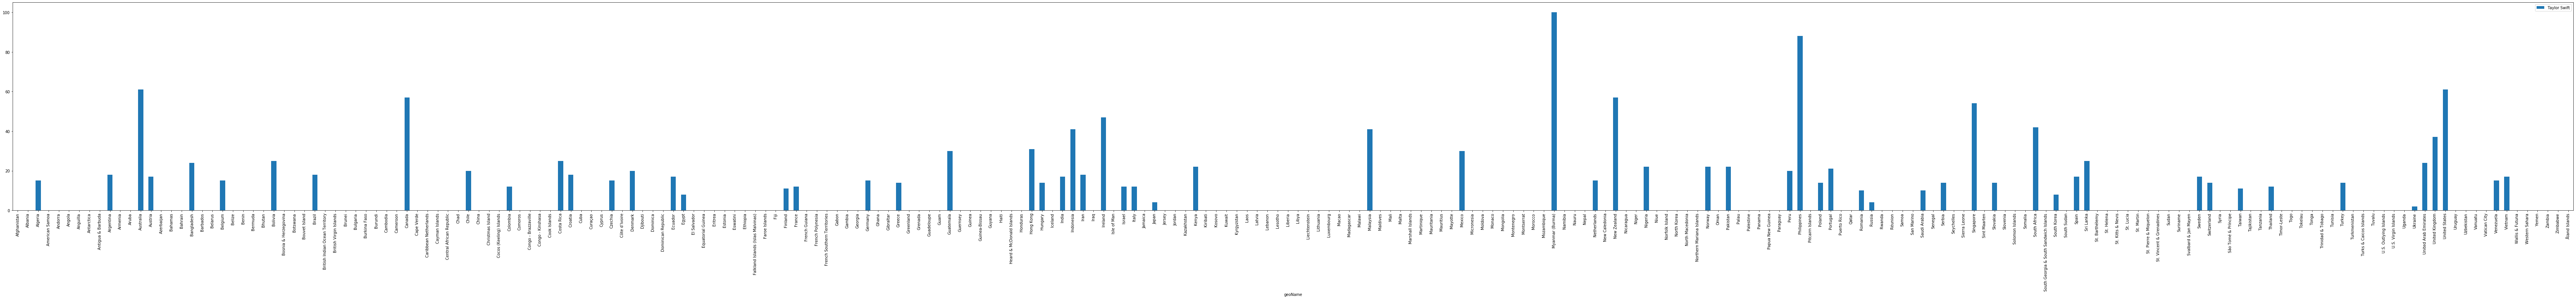

In [13]:
df.reset_index().plot(x='geoName', y='Taylor Swift', figsize=(120, 10), kind ='bar')

In [14]:
# Get Google Hot Trends data
df = pytrend.trending_searches(pn='united_states')
df.head()

,0
0,Sturgis Rally 2020
1,Gretchen Whitmer
2,Champions League
3,Jerry Falwell Jr
4,Justin Hartley
